In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


Recommendation System

Data Preprocessing;

In [3]:

import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv('/content/drive/MyDrive/AMAN_ASSIGNMENTS/AMAN_ASSIGNMENTS/Assignment-11/Recommendation System/anime.csv')
data.head(5)

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [5]:
data.shape

(12294, 7)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [7]:
data.isnull().sum() #checking for missing values

,0
anime_id,0
name,0
genre,62
type,25
episodes,0
rating,230
members,0


In [8]:
df1 = data.dropna() #dropping the null values(rows)

In [9]:
df1.isnull().sum()

,0
anime_id,0
name,0
genre,0
type,0
episodes,0
rating,0
members,0


In [10]:
# checking for duplicate values

df1.duplicated().sum()

0

no duplicate values

In [11]:
df1.columns

Index(['anime_id', 'name', 'genre', 'type', 'episodes', 'rating', 'members'], dtype='object')

In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12017 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12017 non-null  int64  
 1   name      12017 non-null  object 
 2   genre     12017 non-null  object 
 3   type      12017 non-null  object 
 4   episodes  12017 non-null  object 
 5   rating    12017 non-null  float64
 6   members   12017 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 751.1+ KB


In [13]:
df1.describe()

,anime_id,rating,members
count,12017.000000,12017.000000,1.201700e+04
mean,13638.001165,6.478264,1.834888e+04
std,11231.076675,1.023857,5.537250e+04
min,1.000000,1.670000,1.200000e+01
25%,3391.000000,5.890000,2.250000e+02
50%,9959.000000,6.570000,1.552000e+03
75%,23729.000000,7.180000,9.588000e+03
max,34519.000000,10.000000,1.013917e+06


In [14]:
df1.nunique() # checking unique values

,0
anime_id,12017
name,12015
genre,3229
type,6
episodes,187
rating,598
members,6596


In [15]:
df1['genre'].value_counts()

,count
genre,
Hentai,816
Comedy,521
Music,297
Kids,197
"Comedy, Slice of Life",174
...,...
"Adventure, Comedy, Horror, Shounen, Supernatural",1
"Comedy, Harem, Romance, School, Seinen, Slice of Life",1
"Comedy, Ecchi, Sci-Fi, Shounen",1


Visualization

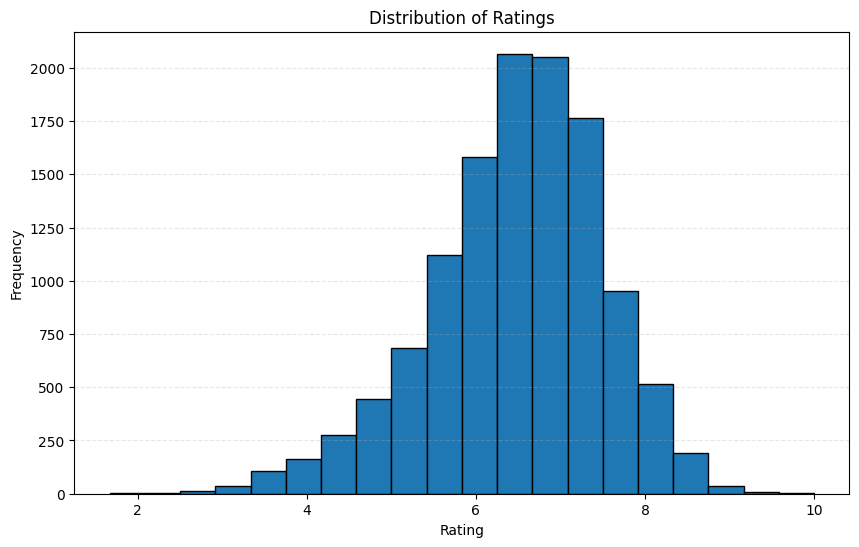

In [16]:
plt.figure(figsize=(10, 6))
plt.hist(df1['rating'], bins=20, edgecolor='black')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.grid(axis='y',alpha = 0.3 , linestyle="--")
#linestyle is type of line
#alpha is the opacity of the grid
plt.show()

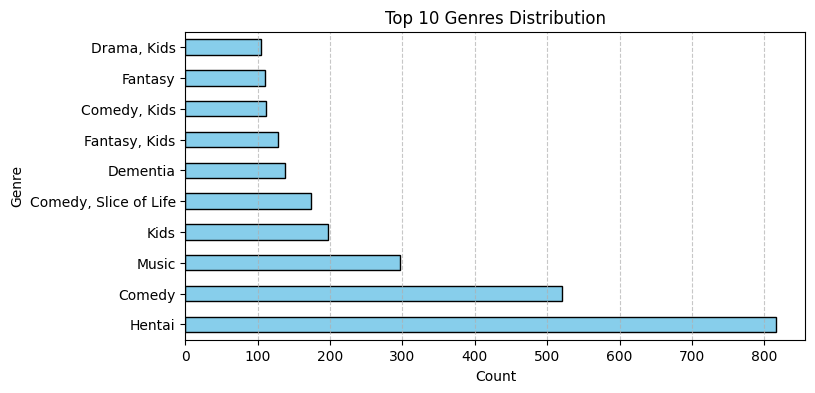

In [17]:
top_genres = df1['genre'].value_counts().head(10)

plt.figure(figsize=(8, 4))
top_genres.plot(kind='barh', color='skyblue', edgecolor='black')
plt.title('Top 10 Genres Distribution')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

Feature extraction

In [18]:
# Converting categorical features "genre" into numerical representations using One-hot encode

genres = df1['genre'].str.get_dummies(sep=', ')
df_numerical = pd.concat([df1.drop('genre', axis=1), genres], axis=1)

In [19]:
# standardization
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_cols = ['rating', 'members']
df_numerical[numerical_cols] = scaler.fit_transform(df_numerical[numerical_cols])

df_numerical.head()

,anime_id,name,type,episodes,rating,members,Action,Adventure,Cars,Comedy,...,Shounen Ai,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Vampire,Yaoi,Yuri
0,32281,Kimi no Na wa.,Movie,1,2.824474,3.292044,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,5114,Fullmetal Alchemist: Brotherhood,TV,64,2.717032,14.002410,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,28977,Gintama°,TV,51,2.707265,1.732216,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,9253,Steins;Gate,TV,24,2.629126,11.833499,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,9969,Gintama&#039;,TV,51,2.619358,2.400518,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0


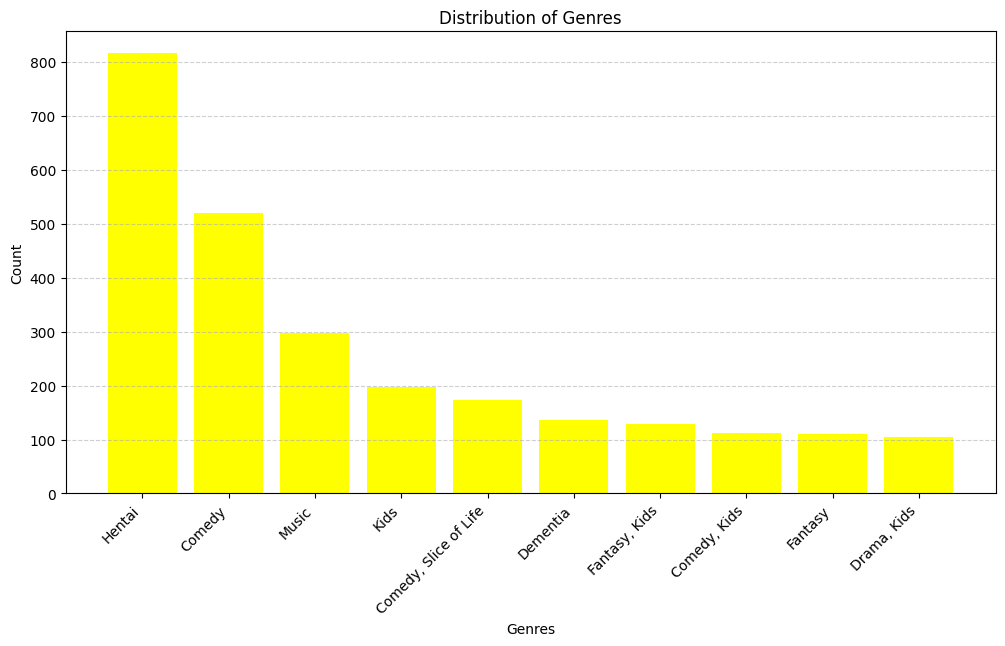

In [24]:
genre_counts = df1['genre'].value_counts().head(10)

plt.figure(figsize=(12, 6))
plt.bar(genre_counts.index, genre_counts.values, color='yellow')
plt.title('Distribution of Genres')
plt.xlabel('Genres')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

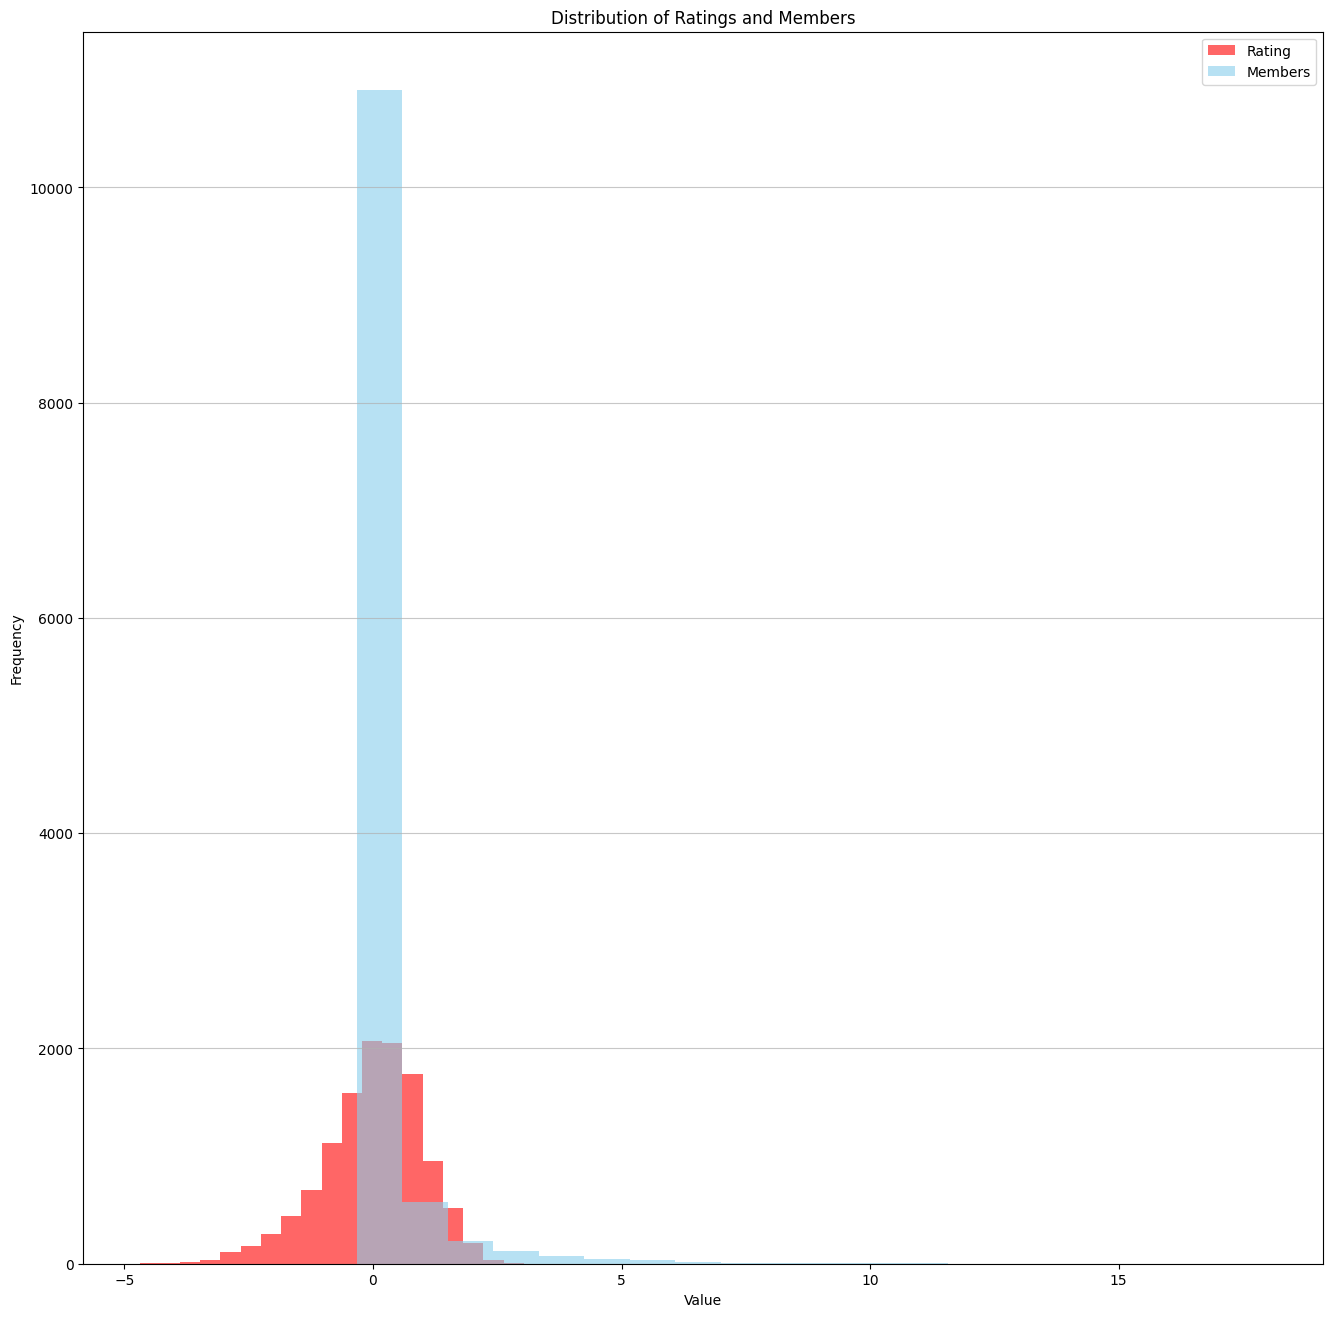

In [32]:
plt.figure(figsize=(16, 16))

# Distribution of Ratings
plt.hist(df_numerical['rating'], bins=20, color='red', alpha=0.6, label='Rating')

# Distribution of Members
plt.hist(df_numerical['members'], bins=20, color='skyblue', alpha=0.6, label='Members')

plt.title('Distribution of Ratings and Members')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.grid(axis='y', alpha=0.7)
plt.show()

In [33]:
from sklearn.metrics.pairwise import cosine_similarity


def recommend_similar_anime(df, target_anime, threshold=0.6):
    df['episodes'] = pd.to_numeric(df['episodes'], errors='coerce')
    df = df.dropna(subset=['episodes'])

    # Extract features for similarity computation
    features = df.drop(['name', 'type'], axis=1)

    # Find the target anime's features
    target_row = features[df['name'] == target_anime]

    if target_row.empty:
        return f"Anime '{target_anime}' not found in the dataset."

    similarities = cosine_similarity(target_row, features).flatten()


    similar_indices = np.where((similarities > threshold) & (df['name'] != target_anime))[0] #get index of similar anime leaving the target anime

    recommended_anime = df.iloc[similar_indices]['name'].tolist() #return list of recommended animes

    return recommended_anime

In [34]:
recommendations = recommend_similar_anime(df_numerical, 'Nana', threshold=0.6)
recommendations_series = pd.Series(recommendations)
top_5_recommendations = recommendations_series.value_counts().head(5)
print(top_5_recommendations)

Saru Kani Gassen           2
Shi Wan Ge Leng Xiaohua    2
Kimi no Na wa.             1
Rebirth Moon Divergence    1
Idol Fight Suchie-Pai 2    1
Name: count, dtype: int64


Evaluation:

In [35]:
df_numerical['liked'] = ((df_numerical['rating'] >= 1)).astype(int)

In [36]:
df_numerical.head()

,anime_id,name,type,episodes,rating,members,Action,Adventure,Cars,Comedy,...,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Vampire,Yaoi,Yuri,liked
0,32281,Kimi no Na wa.,Movie,1.0,2.824474,3.292044,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,5114,Fullmetal Alchemist: Brotherhood,TV,64.0,2.717032,14.002410,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,28977,Gintama°,TV,51.0,2.707265,1.732216,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,9253,Steins;Gate,TV,24.0,2.629126,11.833499,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4,9969,Gintama&#039;,TV,51.0,2.619358,2.400518,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [37]:
df_numerical.isnull().sum()

,0
anime_id,0
name,0
type,0
episodes,187
rating,0
members,0
Action,0
Adventure,0
Cars,0
Comedy,0


In [41]:
df1=df_numerical.dropna()

In [40]:
df1.isnull().sum()

,0
anime_id,0
name,0
type,0
episodes,0
rating,0
members,0
Action,0
Adventure,0
Cars,0
Comedy,0


In [42]:
df1.describe()

,anime_id,episodes,rating,members,Action,Adventure,Cars,Comedy,Dementia,Demons,...,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Vampire,Yaoi,Yuri,liked
count,11830.000000,11830.000000,11830.000000,11830.000000,11830.000000,11830.000000,11830.000000,11830.000000,11830.000000,11830.000000,...,11830.000000,11830.000000,11830.000000,11830.000000,11830.000000,11830.000000,11830.000000,11830.000000,11830.000000,11830.000000
mean,13404.150211,12.486729,0.006197,0.002928,0.232291,0.193829,0.006002,0.378952,0.020118,0.024260,...,0.099746,0.031784,0.044548,0.037616,0.083939,0.007270,0.008453,0.003128,0.003466,0.142604
std,11110.087616,47.097131,0.995442,1.000023,0.422311,0.395313,0.077241,0.485147,0.140411,0.153863,...,0.299674,0.175431,0.206317,0.190274,0.277308,0.084955,0.091555,0.055840,0.058771,0.349683
min,1.000000,1.000000,-4.696423,-0.331169,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3326.250000,1.000000,-0.572139,-0.327191,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9820.500000,2.000000,0.089602,-0.302679,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,23302.500000,12.000000,0.695181,-0.153817,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,34519.000000,1818.000000,3.439820,17.980218,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [43]:
print(df1['liked'].value_counts())

liked
0    10143
1     1687
Name: count, dtype: int64


In [45]:
# spilitting data into training and testing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X = df1.drop(['name', 'type','anime_id'], axis=1)
y = df1['liked']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

model = LogisticRegression()
model.fit(X_train, y_train)
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (8281, 47)
Shape of X_test: (3549, 47)
Shape of y_train: (8281,)
Shape of y_test: (3549,)


In [46]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)

# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


An accuracy score of 1.0 indicates that the model achieved perfect accuracy on the testing data

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression()
model.fit(X_train_scaled, y_train)


y_pred = model.predict(X_test_scaled)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Precision: 1.0
Recall: 1.0
F1-score: 1.0


## Interview Questions:


1. Can you explain the difference between user-based and item-based collaborative filtering?

User-Based Collaborative Filtering:
User-based collaborative filtering makes recommendations by finding users similar to the target user and recommending items that those similar users have like.

Item-Based Collaborative Filtering
Item-based collaborative filtering makes recommendations by finding items similar to the ones the target user has interacted with and recommending those similar items.


2. What is collaborative filtering, and how does it work?
Collaborative filtering is a technique used in recommendation systems to predict a user's preferences based on the preferences of other users. The core idea is that users who have agreed in the past will agree in the future, and items that have similar appeal to users will continue to have similar appeal.